In [1]:
import pandas as pd
import numpy as np


In [2]:
churn_data = pd.read_csv("/content/churn_data.csv")
customer_data = pd.read_csv('/content/customer_data.csv')
internet_data = pd.read_csv('/content/internet_data.csv')

In [3]:
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID') #merged data

In [4]:
print(type(df_1))
print(type(internet_data))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [5]:
# Final data
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')

In [6]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [7]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [8]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


# DATA PREPRATION

In [9]:
telecom['PhoneService'] = telecom['PhoneService'].map({"Yes" : 1, "No" : 0})

telecom['PaperlessBilling'] = telecom['PaperlessBilling'].map({"Yes" : 1, "No" : 0})

telecom['Churn'] = telecom['Churn'].map({"Yes" : 1, "No" : 0})

telecom['Partner'] = telecom['Partner'].map({"Yes" : 1, "No" : 0})

telecom['Dependents'] = telecom['Dependents'].map({"Yes" : 1, "No" : 0})

telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


## Dummy Variable creation

In [10]:
# Creating a dummy variable for the variable 'Contract' and keeping drop_first=True

cont = pd.get_dummies(telecom['Contract'], drop_first=True) # Encoding
cont = cont.astype(int) # Integer conversion
cont.columns = ['Contract_One_year', 'Contract_Two_year']
telecom = pd.concat([telecom, cont], axis=1)
telecom.drop(['Contract'], axis=1, inplace=True) # Deleting duplicate column altogether
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,...,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One_year,Contract_Two_year
0,7590-VHVEG,1,0,1,Electronic check,29.85,29.85,0,Female,0,...,No phone service,DSL,No,Yes,No,No,No,No,0,0
1,5575-GNVDE,34,1,0,Mailed check,56.95,1889.5,0,Male,0,...,No,DSL,Yes,No,Yes,No,No,No,1,0
2,3668-QPYBK,2,1,1,Mailed check,53.85,108.15,1,Male,0,...,No,DSL,Yes,Yes,No,No,No,No,0,0
3,7795-CFOCW,45,0,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,...,No phone service,DSL,Yes,No,Yes,Yes,No,No,1,0
4,9237-HQITU,2,1,1,Electronic check,70.70,151.65,1,Female,0,...,No,Fiber optic,No,No,No,No,No,No,0,0


In [11]:
# # Creating a dummy variable for the variable 'PaymentMethod' and keeping drop_first=True

pm = pd.get_dummies(telecom['PaymentMethod'], drop_first=True) # Encoding
pm = pm.astype(int) # Integer conversion
pm.columns = ['PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
telecom = pd.concat([telecom, pm], axis=1)
telecom.drop(['PaymentMethod'], axis=1, inplace=True) # Deleting duplicate column altogether
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One_year,Contract_Two_year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,1,29.85,29.85,0,Female,0,1,...,Yes,No,No,No,No,0,0,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,Male,0,0,...,No,Yes,No,No,No,1,0,0,0,1
2,3668-QPYBK,2,1,1,53.85,108.15,1,Male,0,0,...,Yes,No,No,No,No,0,0,0,0,1
3,7795-CFOCW,45,0,0,42.30,1840.75,0,Male,0,0,...,No,Yes,Yes,No,No,1,0,0,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,Female,0,0,...,No,No,No,No,No,0,0,0,1,0


In [12]:
# # Creating a dummy variable for the variable 'gender' and keeping drop_first=True

gen = pd.get_dummies(telecom['gender'], drop_first=True) # Encoding
gen = gen.astype(int) # Integer conversion
gen.columns = ['gender_male']
telecom = pd.concat([telecom, gen], axis=1)
telecom.drop(['gender'], axis=1, inplace=True) # Deleting duplicate column altogether
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One_year,Contract_Two_year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_male
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,No,No,No,No,0,0,0,1,0,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,...,Yes,No,No,No,1,0,0,0,1,1
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,No,No,No,No,0,0,0,0,1,1
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,Yes,Yes,No,No,1,0,0,0,0,1
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,No,No,No,No,0,0,0,1,0,0


In [13]:
# Creating a dummy variable for the variable 'MultipleLines' and keeping drop_first=True

ml1 = pd.get_dummies(telecom['MultipleLines']) # Encoding
ml1 = ml1.astype(int) # Integer conversion
ml1.head()



,No,No phone service,Yes
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0


In [14]:
ml1=ml1.drop(['No phone service'], axis=1)

In [15]:
ml1.head()

,No,Yes
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [16]:
ml1.columns = ['MultipleLines_No','MultipleLines_Yes']
telecom = pd.concat([telecom, ml1], axis=1)
telecom.drop(['MultipleLines'], axis=1, inplace=True) # Deleting duplicate column altogether
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,StreamingTV,StreamingMovies,Contract_One_year,Contract_Two_year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_male,MultipleLines_No,MultipleLines_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,...,No,No,1,0,0,0,1,1,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,No,No,0,0,0,0,1,1,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,No,No,0,0,0,1,0,0,1,0


In [17]:
# Creating a dummy variable for the variable 'InternetService' and keeping drop_first=True

iser = pd.get_dummies(telecom['InternetService'], drop_first= True) # Encoding
iser = iser.astype(int) # Integer conversion
iser.columns = ['InternetService_Fiber optic','InternetService_No']
telecom = pd.concat([telecom, iser], axis=1)
telecom.drop(['InternetService'], axis=1, inplace=True) # Deleting duplicate column altogether
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,Contract_One_year,Contract_Two_year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_male,MultipleLines_No,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,...,1,0,0,0,1,1,1,0,0,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,0,0,0,1,1,1,0,0,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [18]:
# Creating a dummy variable for the variable 'OnlineSecurity'

os = pd.get_dummies(telecom['OnlineSecurity']) # Encoding
os = os.astype(int) # Integer conversion
os = os.drop(['No internet service'], axis =1)
os.columns = ['OnlineSecurity_No','OnlineSecurity_Yes']
telecom = pd.concat([telecom, os], axis=1)
telecom.drop(['OnlineSecurity'], axis=1, inplace=True) # Deleting duplicate column altogether
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_male,MultipleLines_No,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,0,1,1,1,0,0,0,0,1
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,0,1,0,0,1,0,1,0,1,0


In [19]:
# Creating a dummy variable for the variable 'OnlineBackup' and keeping drop_first=True

ob = pd.get_dummies(telecom['OnlineBackup']) # Encoding
ob = ob.astype(int)

In [20]:
ob = ob.drop(['No internet service'],axis=1)

In [21]:
ob.head()

,No,Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [22]:
ob.columns = ['OnlineBackup_No','OnlineBackup_Yes']
telecom = pd.concat([telecom, ob], axis=1)
telecom.drop(['OnlineBackup'], axis=1, inplace=True) # Deleting duplicate column altogether
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,PaymentMethod_Mailed check,gender_male,MultipleLines_No,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,...,1,1,1,0,0,0,0,1,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,1,1,1,0,0,0,0,1,0,1
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0


In [23]:
# reating a dummy variable for the variable 'DeviceProtection' and keeping drop_first=True

dp = pd.get_dummies(telecom['DeviceProtection']) # Encoding
dp = dp.astype(int)
dp.head()

,No,No internet service,Yes
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0


In [24]:
dp = dp.drop(['No internet service'],axis=1)


In [25]:
dp.head()

,No,Yes
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


In [26]:
dp.columns = ['DeviceProtection_No','DeviceProtection_Yes']
telecom = pd.concat([telecom, dp], axis=1)
telecom.drop(['DeviceProtection'], axis=1, inplace=True) # Deleting duplicate column altogether
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,MultipleLines_No,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,...,1,0,0,0,0,1,1,0,0,1
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,1,0,0,0,0,1,0,1,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [27]:
# Creating a dummy variable for the variable 'TechSupport' and keeping drop_first=True

ts = pd.get_dummies(telecom['TechSupport']) # Encoding
ts = ts.astype(int)
ts.head()

,No,No internet service,Yes
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0


In [28]:
ts = ts.drop(['No internet service'],axis=1)


In [29]:
ts.head()

,No,Yes
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0


In [30]:
ts.columns = ['TechSupport_No','TechSupport_Yes']
telecom = pd.concat([telecom, ts], axis=1)
telecom.drop(['TechSupport'], axis=1, inplace=True) # Deleting duplicate column altogether
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,0,1,0,0,1,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,...,0,0,0,1,1,0,0,1,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,0,0,1,0,1,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,0,0,0,1,1,0,0,1,0,1
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [31]:
  #Creating a dummy variable for the variable 'StreamingTV' and keeping drop_first=True
st = pd.get_dummies(telecom['StreamingTV']) # Encoding
st = st.astype(int)
st.head()


,No,No internet service,Yes
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [32]:
st = st.drop(['No internet service'],axis=1)



In [33]:
st.head()

,No,Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [34]:
st.columns = ['StreamingTV_No','StreamingTV_Yes']
telecom = pd.concat([telecom, st], axis=1)
telecom.drop(['StreamingTV'], axis=1, inplace=True) # Deleting duplicate column altogether
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,1,0,0,1,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,...,0,1,1,0,0,1,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,0,1,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,0,1,1,0,0,1,0,1,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [35]:
# Creating a dummy variable for the variable 'StreamingMovies' and keeping drop_first=True
sm = pd.get_dummies(telecom['StreamingMovies']) # Encoding
sm = sm.astype(int)
sm.head()


,No,No internet service,Yes
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [36]:
sm = sm.drop(['No internet service'],axis=1)
sm.head()


,No,Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [37]:
sm.columns = ['StreamingMovies_No','StreamingMovies_Yes']
telecom = pd.concat([telecom, sm], axis=1)
telecom.drop(['StreamingMovies'], axis=1, inplace=True) # Deleting duplicate column altogether
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [38]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   object 
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One_year                      7043 non-null   int64  
 11  Cont

# Checking the outliers

In [39]:
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [40]:
num_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   MonthlyCharges  7043 non-null   float64
 2   SeniorCitizen   7043 non-null   int64  
 3   TotalCharges    7043 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 220.2+ KB


In [41]:
telecom['TotalCharges'] = telecom['TotalCharges'].replace(' ', np.nan)
telecom['TotalCharges'] = telecom['TotalCharges'].astype('float64')
telecom['TotalCharges'] = telecom['TotalCharges'].fillna(0)


In [42]:
num_telecom.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
90%,69.000000,102.600000,1.000000
95%,72.000000,107.400000,1.000000
99%,72.000000,114.729000,1.000000


## Checking percentage of missing values

In [43]:
missing_percentage = telecom.isnull().mean() * 100

print(missing_percentage)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One_year                        0.0
Contract_Two_year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_male                              0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

## feature stadardization

In [44]:
df = telecom[['tenure','MonthlyCharges','TotalCharges']]
df.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
ss = StandardScaler()

In [47]:
std_df =  ss.fit_transform(df)

In [48]:
std_df = pd.DataFrame(std_df, columns=df.columns)

In [49]:
std_df.head()

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.992611
1,0.066327,-0.259629,-0.172165
2,-1.236724,-0.362660,-0.958066
3,0.514251,-0.746535,-0.193672
4,-1.236724,0.197365,-0.938874


In [50]:
telecom = telecom.drop(['tenure','MonthlyCharges','TotalCharges'], axis =1)

In [51]:
telecom = pd.concat([telecom,std_df], axis =1)

In [52]:
telecom.tail()

,customerID,PhoneService,PaperlessBilling,Churn,SeniorCitizen,Partner,Dependents,Contract_One_year,Contract_Two_year,PaymentMethod_Credit card (automatic),...,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
7038,6840-RESVB,1,1,0,0,1,1,1,0,0,...,1,0,1,0,1,0,1,-0.340876,0.665992,-0.127605
7039,2234-XADUH,1,1,0,0,1,1,1,0,1,...,1,1,0,0,1,0,1,1.613701,1.277533,2.242606
7040,4801-JZAZL,0,1,0,0,1,1,0,0,0,...,0,1,0,1,0,1,0,-0.870241,-1.168632,-0.852932
7041,8361-LTMKD,1,1,1,1,1,0,0,0,0,...,0,1,0,1,0,1,0,-1.155283,0.320338,-0.870513
7042,3186-AJIEK,1,1,0,0,0,0,0,1,0,...,1,0,1,0,1,0,1,1.369379,1.358961,2.013897


## Checking the churn rate

In [53]:
telecom['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


In [54]:
churn_count = telecom['Churn'].sum()
churn_count

1869

In [55]:
total_count = len(telecom['Churn'])
total_count

7043

In [56]:
per = (churn_count/total_count) * 100
per

26.536987079369588

##### Almost 27% churn rate

# Model Building


In [57]:
X= telecom.drop(['customerID', 'Churn'], axis =1)

y = telecom['Churn']

In [58]:
X.shape

(7043, 30)

In [59]:
y.shape

(7043,)

In [60]:
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


## Running first training model

In [61]:
import statsmodels.api as sm


In [62]:
from sklearn.model_selection import train_test_split


In [63]:
X = sm.add_constant(X) # add constant (intercept)

# Splitting the data into train and test with train_size=0.7 and random_state=100
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .7, random_state=100)

In [64]:
# Fit the model using statsmodels
logm1 = sm.Logit(y_train, X_train).fit()

# Get the summary of the logistic regression model
print(logm1.summary())

Optimization terminated successfully.
         Current function value: 0.407308
         Iterations 26
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                          Logit   Df Residuals:                     4906
Method:                           MLE   Df Model:                           23
Date:                Mon, 04 Nov 2024   Pseudo R-squ.:                  0.2947
Time:                        11:56:39   Log-Likelihood:                -2008.0
converged:                       True   LL-Null:                       -2847.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.5563     

#### Dropping least important variables as they have less than 70% confidence to reject the null hyposthesis looking into P values.

In [65]:
X = X.drop(['Partner','PaymentMethod_Credit card (automatic)','PaymentMethod_Mailed check','gender_male','MultipleLines_Yes','OnlineBackup_No','OnlineBackup_Yes','DeviceProtection_No','DeviceProtection_Yes','TechSupport_No','TechSupport_Yes','StreamingMovies_No','StreamingMovies_Yes'], axis = 1)

In [66]:
X.columns

Index(['const', 'PhoneService', 'PaperlessBilling', 'SeniorCitizen',
       'Dependents', 'Contract_One_year', 'Contract_Two_year',
       'PaymentMethod_Electronic check', 'MultipleLines_No',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'tenure', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

# Correlation Matrix

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [68]:
corr = X.corr()

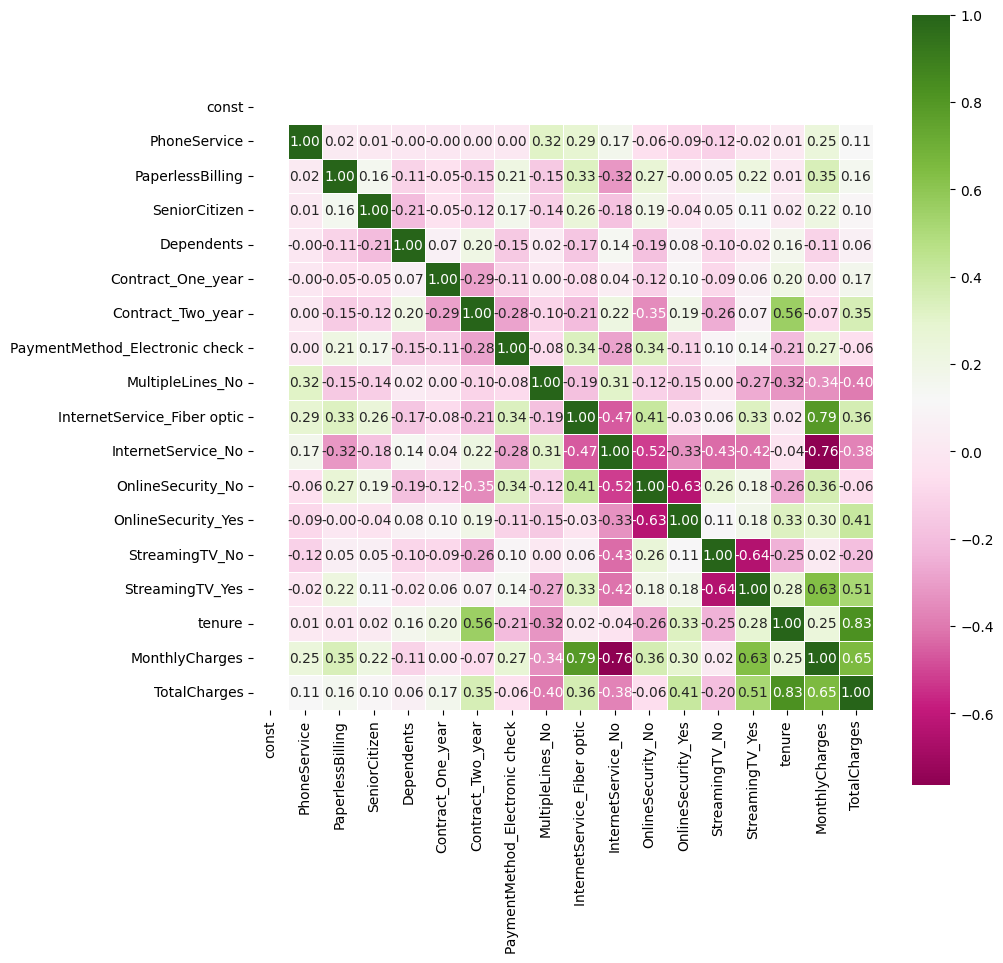

In [69]:
plt.figure(figsize = (10,10))

sns.heatmap(corr, annot=True, fmt=".2f", cmap='PiYG', square=True, cbar=True, linewidths=.5)

plt.show()

## Dropping highly corelated variables

In [70]:
def correlation(dataset, threshold):

    # Set of all the names of correlated columns
    col_corr = set()

    # Loop through the correlation matrix
    for i in range(len(corr.columns)):
        for j in range(i):
            # We are interested in absolute correlation value
            if abs(corr.iloc[i, j]) > threshold:  # if correlation is above the threshold
                # Get the name of the column
                colname = corr.columns[i]
                # Add the column name to the set of correlated columns
                col_corr.add(colname)

    # Return the set of correlated columns to be dropped
    return col_corr


In [71]:
# Call the function and pass your dataset and threshold (e.g., 0.7 for 70%)
corr_features = correlation(X, 0.7)
corr_features

{'MonthlyCharges', 'TotalCharges'}

In [72]:
X = X.drop(columns=corr_features)

In [73]:
X.columns

Index(['const', 'PhoneService', 'PaperlessBilling', 'SeniorCitizen',
       'Dependents', 'Contract_One_year', 'Contract_Two_year',
       'PaymentMethod_Electronic check', 'MultipleLines_No',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'tenure'],
      dtype='object')

## Dropping Variables with high VIF

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
def vif_scores(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

In [76]:
vif_df = vif_scores(X)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [77]:
print(vif_df)

                           Feature           VIF
0                            const  0.000000e+00
1                     PhoneService  1.449461e+00
2                 PaperlessBilling  1.202914e+00
3                    SeniorCitizen  1.135462e+00
4                       Dependents  1.112825e+00
5                Contract_One_year  1.582804e+00
6                Contract_Two_year  2.503419e+00
7   PaymentMethod_Electronic check  1.282042e+00
8                 MultipleLines_No  1.448926e+00
9      InternetService_Fiber optic  1.941736e+00
10              InternetService_No           inf
11               OnlineSecurity_No  3.460384e+04
12              OnlineSecurity_Yes  4.775197e+07
13                  StreamingTV_No  5.530341e+04
14                 StreamingTV_Yes  8.450569e+06
15                          tenure  2.366284e+00


### Dropping variables having VIF more than 5

In [78]:
X = X.drop(['InternetService_No','StreamingTV_No','StreamingTV_Yes'], axis=1)

### Checking correlation again

In [79]:
corr_1 = X.corr()

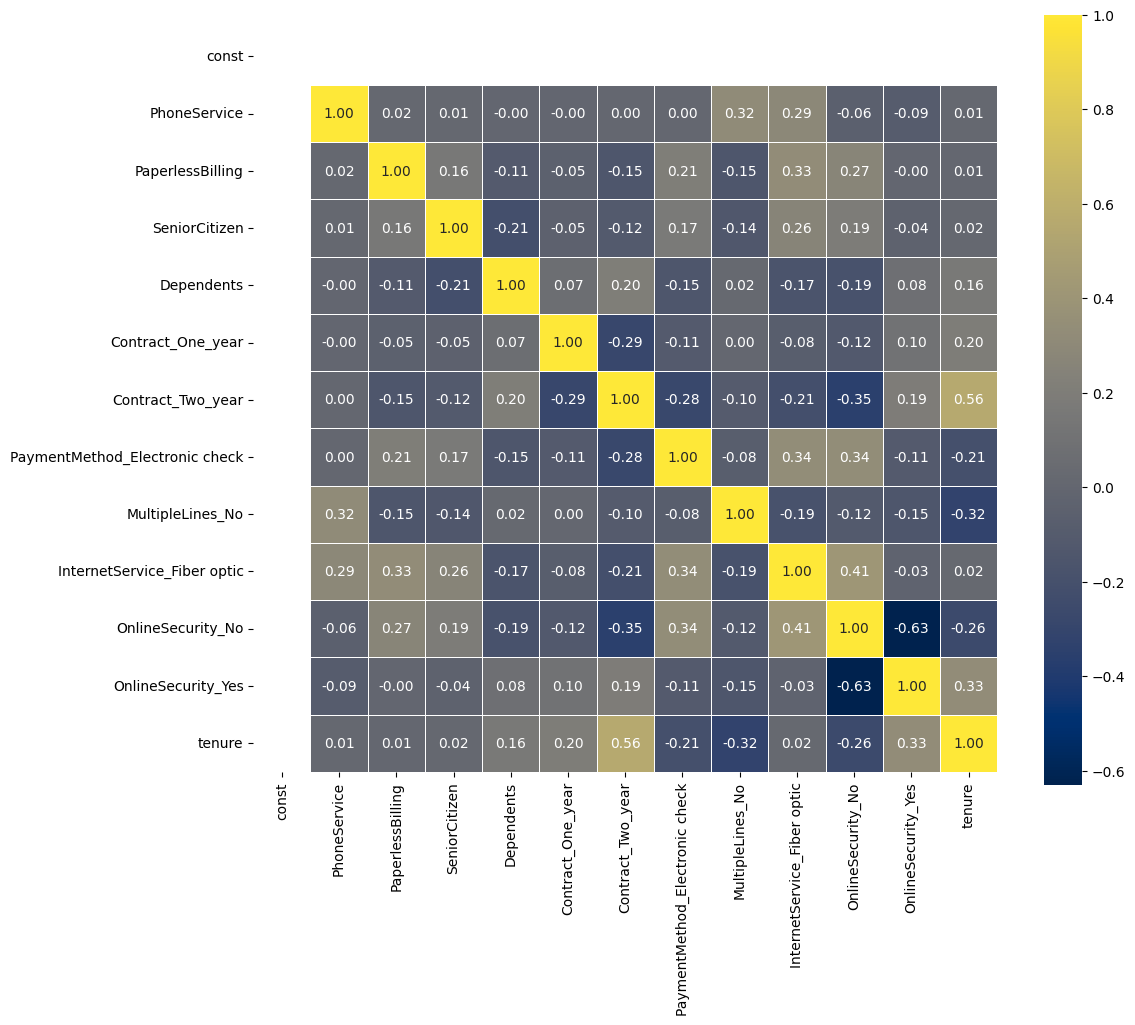

In [80]:
plt.figure(figsize = (12,10))

sns.heatmap(corr_1, annot=True, fmt=".2f", cmap='cividis', square=True, cbar=True, linewidths=.5)

plt.show()

### Re-running the model

In [81]:
# Splitting the data into train and test with train_size=0.7 and random_state=100 again
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .7, random_state=100)

In [82]:
# Fit the model using statsmodels
logm2 = sm.Logit(y_train, X_train).fit()

# Get the summary of the logistic regression model
print(logm2.summary())

Optimization terminated successfully.
         Current function value: 0.413080
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                          Logit   Df Residuals:                     4917
Method:                           MLE   Df Model:                           12
Date:                Mon, 04 Nov 2024   Pseudo R-squ.:                  0.2847
Time:                        11:56:42   Log-Likelihood:                -2036.5
converged:                       True   LL-Null:                       -2847.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.1543      0.209    -10.331     

## Feature Selection using RFE

#### Feature selection using LogisticRegression with RFE

In [83]:
# Import necessary modules
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initiate LogisticRegression
logreg = LogisticRegression()

# Initialize RFE with LogisticRegression as the estimator and specify the number of features to select
rfe = RFE(estimator=logreg, n_features_to_select=5)  # Change 5 to your desired number of features

# Fit RFE on your dataset (assuming X and y are defined)
rfe = rfe.fit(X, y)

# Printing the boolean results showing selected features
print("Selected Features (True = Selected):", rfe.support_)

# Printing the ranking of all features
print("Feature Ranking:", rfe.ranking_)


Selected Features (True = Selected): [False False False False False  True  True False False  True  True False
  True]
Feature Ranking: [9 7 5 6 8 1 1 3 4 1 1 2 1]


In [84]:
# Assuming X is a DataFrame with feature names
selected_features = X.columns[rfe.support_]

# Print the selected feature names
print("Features selected by RFE:", selected_features)


Features selected by RFE: Index(['Contract_One_year', 'Contract_Two_year', 'InternetService_Fiber optic',
       'OnlineSecurity_No', 'tenure'],
      dtype='object')


In [85]:
# Create a new DataFrame 'col' with only the selected features
col = X[X.columns[rfe.support_]]

# Display the new DataFrame
print("DataFrame with selected features by RFE:")
print(col)

DataFrame with selected features by RFE:
      Contract_One_year  Contract_Two_year  InternetService_Fiber optic  \
0                     0                  0                            0   
1                     1                  0                            0   
2                     0                  0                            0   
3                     1                  0                            0   
4                     0                  0                            1   
...                 ...                ...                          ...   
7038                  1                  0                            0   
7039                  1                  0                            1   
7040                  0                  0                            0   
7041                  0                  0                            1   
7042                  0                  1                            1   

      OnlineSecurity_No    tenure  
0                     

In [86]:
# Let's run the model using the selected variables but this time we will use Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Initialize Logistic Regression
logsk = LogisticRegression()

# Fit the model using the selected features
logsk.fit(col, y)  # Assuming 'col' is the DataFrame of selected features and 'y' is the target variable


LogisticRegression()

In [87]:
import statsmodels.api as sm

# Add a constant to the selected features (for the intercept term)
col_1 = sm.add_constant(col)

# Splitting the data into train and test with train_size=0.7 and random_state=100 again
X_train, X_test, y_train, y_test = train_test_split(col_1, y, train_size = .7, random_state=100)

# Initialize and fit the logistic regression model with StatsModels
logm3 = sm.Logit(y, col_1).fit()

# Display the summary of the model
print(logm3.summary())


Optimization terminated successfully.
         Current function value: 0.430116
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7037
Method:                           MLE   Df Model:                            5
Date:                Mon, 04 Nov 2024   Pseudo R-squ.:                  0.2566
Time:                        11:56:42   Log-Likelihood:                -3029.3
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.9097      0.078    -24.506      0.000   

## Making Predictions

In [88]:
# Predicted probabilities
y_pred = logm3.predict(col_1)



In [89]:
# Convert y_pred (predicted probabilities) to a DataFrame
y_pred_df = pd.DataFrame(y_pred, columns=['Predicted_Probabilities'])

# Display the new DataFrame
print(y_pred_df)

      Predicted_Probabilities
0                    0.418423
1                    0.058278
2                    0.254630
3                    0.043725
4                    0.705970
...                       ...
7038                 0.075344
7039                 0.132617
7040                 0.210538
7041                 0.694420
7042                 0.036402

[7043 rows x 1 columns]


## Model Evaluation

In [90]:
from sklearn import metrics


In [91]:
y_pred = logsk.predict(col)

In [92]:
# Assuming y_test is the true labels and y_pred is the predicted labels
confusion = metrics.confusion_matrix(y, y_pred)

# Display the confusion matrix
print("Confusion Matrix:\n", confusion)


Confusion Matrix:
 [[4649  525]
 [ 970  899]]


In [93]:
# Overall accuracy
accuracy = metrics.accuracy_score(y, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7877325003549623


In [94]:
TP = confusion[1, 1]  # True Positives: correctly predicted positive cases
TN = confusion[0, 0]  # True Negatives: correctly predicted negative cases
FP = confusion[0, 1]  # False Positives: incorrectly predicted as positive
FN = confusion[1, 0]  # False Negatives: incorrectly predicted as negative

# Display the values
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

True Positives (TP): 899
True Negatives (TN): 4649
False Positives (FP): 525
False Negatives (FN): 970


In [95]:
# Let's see the sensitivity of our logistic regression model
# Calculate sensitivity
sensitivity = TP / (TP + FN)

# Display the sensitivity
print("Sensitivity (Recall) of the model:", sensitivity)



Sensitivity (Recall) of the model: 0.4810058855002675


In [96]:
# Calculate specificity
specificity = TN / (TN + FP)

# Display the specificity
print("Specificity of the model:", specificity)


Specificity of the model: 0.898531117124082


In [97]:
# Calculate false positive rate
false_positive_rate = FP / (FP + TN)

# Display the false positive rate
print("False Positive Rate (FPR):", false_positive_rate)


False Positive Rate (FPR): 0.10146888287591806


In [98]:
# Calculate positive predictive value (precision)
positive_predictive_value = TP / (TP + FP)

# Display the positive predictive value
print("Positive Predictive Value (PPV):", positive_predictive_value)


Positive Predictive Value (PPV): 0.6313202247191011


In [99]:
# Calculate negative predictive value
negative_predictive_value = TN / (TN + FN)

# Display the negative predictive value
print("Negative Predictive Value (NPV):", negative_predictive_value)


Negative Predictive Value (NPV): 0.8273714184018509


In [100]:
from sklearn.metrics import classification_report

# Assuming y_test contains the true labels and y_pred contains the predicted labels
report = classification_report(y, y_pred)

# Print the classification report
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      5174
           1       0.63      0.48      0.55      1869

    accuracy                           0.79      7043
   macro avg       0.73      0.69      0.70      7043
weighted avg       0.78      0.79      0.78      7043



## ROC Curve

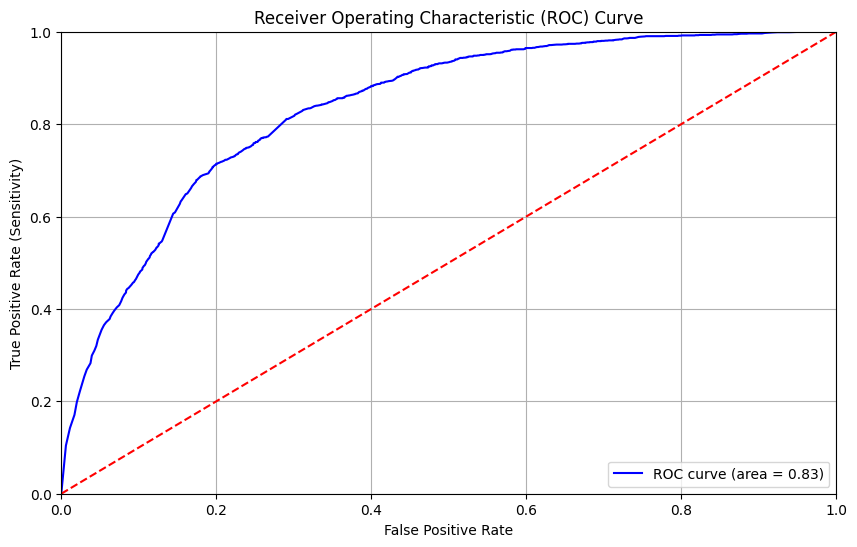

In [104]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_pred = logsk.predict(col)  # Assuming the second column is the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred_df)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
